In [3]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

## This code create IMERG 30 minutes data to 3 hour data files

In [26]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite','IMERG','30_min')
dir_out = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite','IMERG','3_hour')

In [5]:
IMERG_files = glob.glob(os.path.join(dir_base,'*.nc'))
IMERG_files = sorted(IMERG_files)
IMERG_len = len(IMERG_files)
print(f'Number of IMERG files: {IMERG_len}')

Number of IMERG files: 24


In [33]:
name_out = IMERG_files[0].split('/')[-1].replace('30min','3h')
name_out

'IMERG_Italy_3h_2000_06_01_2000_12_31.nc'

In [34]:
for nn in range(IMERG_len):
    name_out = IMERG_files[nn].split('/')[-1].replace('30min','3h')

    DATA = xr.open_dataset(IMERG_files[nn])
    DATA = DATA.resample(time ='3h').sum(dim='time', skipna=False) # 3 hour accumulation

    lat = DATA['lat'].data
    lon = DATA['lon'].data
    lon2d, lat2d = np.meshgrid(lon, lat)

    dir_final = os.path.join(dir_out, name_out)
    DATA.to_netcdf(dir_final)

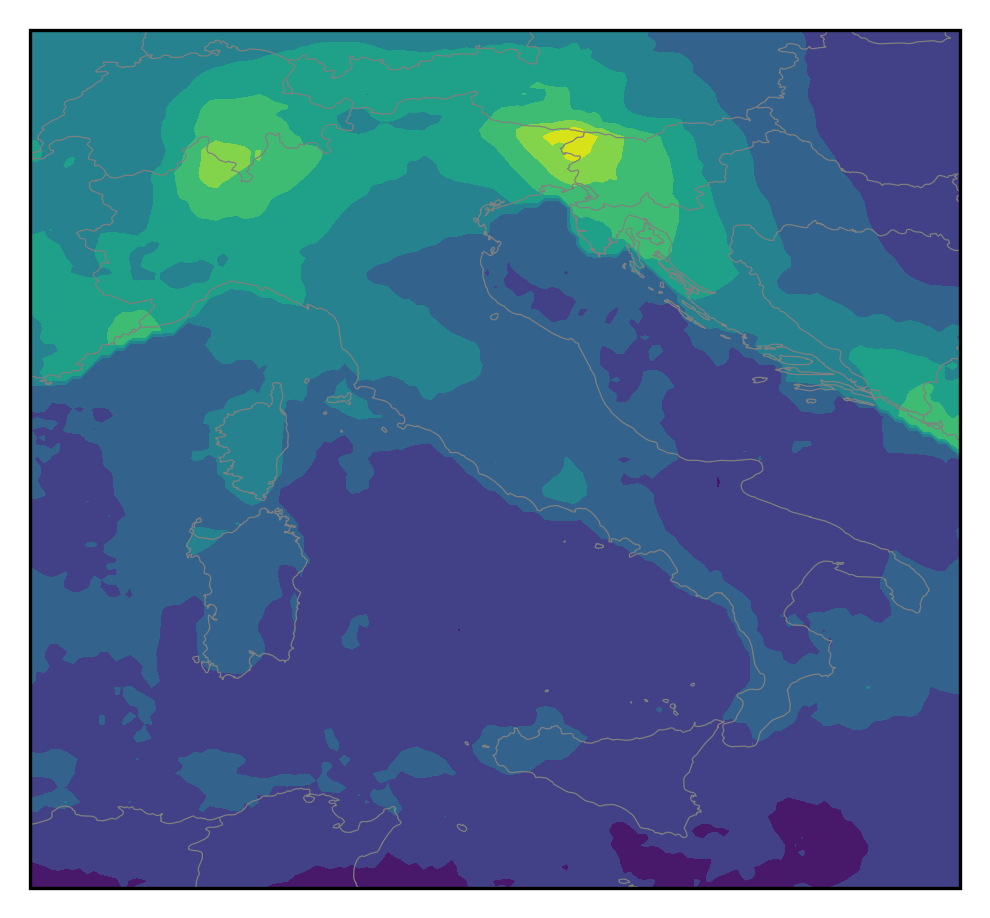

In [25]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0:], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,color='grey')
ax1.add_feature(cf.BORDERS,linewidth=0.3,color='grey')

a1 = ax1.contourf(lon2d, lat2d, np.nanmean(DATA['PRE'].data,axis=0))